 # ***Human Activity Recognition System***



In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score
import numpy as np

In [ ]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
train_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [ ]:
train_df.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [ ]:
test_df.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [ ]:
y_train = train_df['Activity']
y_test = test_df['Activity']

X_train = train_df.drop(columns = ['Activity', 'subject'])
X_test = test_df.drop(columns = ['Activity', 'subject'])

In [ ]:
y_train

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

In [ ]:
fig = px.bar(y_train,x=y_train.unique(),y=y_train.value_counts(),color=y_train.unique())
fig.update_layout(
    title='Count of Each Activity',
    xaxis_title='Activities',
    yaxis_title='Count')
fig.show()

In [ ]:
pie = px.pie(y_train,names=y_train.unique(),values=y_train.value_counts(),color=y_train.unique())
pie.show()

In [ ]:
# Initialize counts
Acc = 0
Gyro = 0
other = 0

# Count occurrences of "Acc", "Gyro", and other strings in column names
for value in X_train.columns:
    if "Acc" in str(value):
        Acc += 1
    elif "Gyro" in str(value):
        Gyro += 1
    else:
        other += 1

# Create a DataFrame for the bar chart
data = pd.DataFrame({'Sensor': ['Accelerometer', 'Gyroscope', 'Others'],
                     'Count': [Acc, Gyro, other]})

# Create the bar chart using Plotly Express
bar_fig = px.bar(data, x='Sensor', y='Count', color='Sensor', color_discrete_map={'Accelerometer': 'red', 'Gyroscope': 'green', 'Others': 'blue'})

# Set the title and axis labels
bar_fig.update_layout(
    title='Sensor Counts',
    xaxis_title='Sensor Type',
    yaxis_title='Count'
)

# Show the plot
bar_fig.show()

In [ ]:

# Get unique subjects
subjects = train_df['subject'].unique()

# Create a time_series column based on subject changes
encoder = LabelEncoder()
train_df['Time'] = encoder.fit_transform(train_df['subject']) + 1

# Plotting using Plotly Express
fig = px.line(train_df, x='Time', y='angle(X,gravityMean)', color='subject',
              labels={'angle(X,gravityMean)': 'Angle', 'Time': 'Time'},
              title='Angle between X and mean Gravity v/s Time for various subjects',
              line_shape='linear')

fig.update_layout(xaxis=dict(title='Time', tickfont=dict(size=14)),
                  yaxis=dict(title='Angle', tickfont=dict(size=14)),
                  legend=dict(title='Subject', font=dict(size=14)))

fig.show()

In [ ]:
accuracy_scores = np.zeros(4)
confusion_matrices = []

# Support Vector Classifier
clf = SVC().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
conf_matrix = confusion_matrix(y_test, prediction)
confusion_matrices.append(conf_matrix)
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

# Logistic Regression
clf = LogisticRegression().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
conf_matrix = confusion_matrix(y_test, prediction)
confusion_matrices.append(conf_matrix)
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

# K Nearest Neighbors
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
conf_matrix = confusion_matrix(y_test, prediction)
confusion_matrices.append(conf_matrix)
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))

# Random Forest
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction)*100
conf_matrix = confusion_matrix(y_test, prediction)
confusion_matrices.append(conf_matrix)
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))

classifiers = ['Support Vector Classifier', 'Logistic Regression', 'K Nearest Neighbors', 'Random Forest']
data = pd.DataFrame({'Classifier': classifiers, 'Accuracy': accuracy_scores})

fig = px.bar(data, x='Classifier', y='Accuracy', color='Classifier',
             labels={'Accuracy': 'Accuracy (%)'}, title='Accuracy of various algorithms',
             text='Accuracy', height=500)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(xaxis_tickangle=-45, xaxis=dict(tickfont=dict(size=12)),
                  yaxis=dict(tickfont=dict(size=12)), legend_title_text='Classifiers',
                  title_font_size=20, title_x=0.5, title_y=0.92)

fig.show()

Support Vector Classifier accuracy: 95.04580929759076%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression accuracy: 95.82626399728538%
K Nearest Neighbors Classifier accuracy: 90.02375296912113%
Random Forest Classifier accuracy: 92.67051238547675%


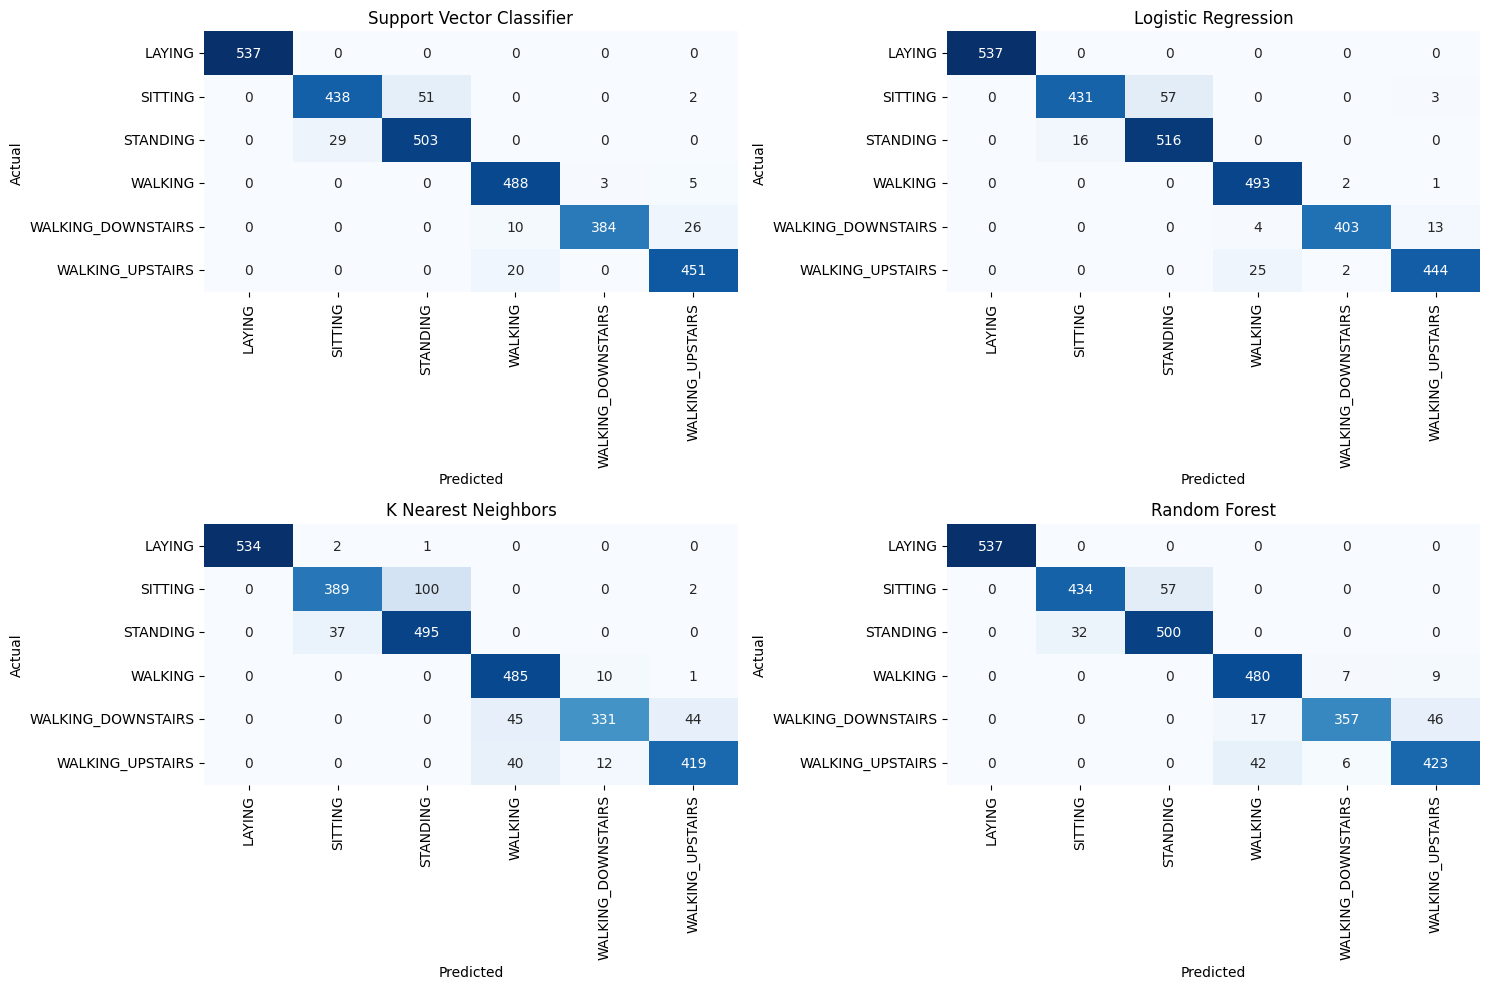

In [ ]:
# Plot confusion matrices
plt.figure(figsize=(15, 10))
for i, conf_matrix in enumerate(confusion_matrices):
    plt.subplot(2, 2, i+1)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(classifiers[i])
plt.tight_layout()
plt.show()